In [22]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline


**Data Import**

In [23]:
train_path='Dataset/Train'
valid_path='Dataset/Valid'
test_path='Dataset/Test'

In [25]:

datagen = ImageDataGenerator(
    rotation_range=20,
    fill_mode='constant',
    height_shift_range=0.1,
    width_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2
)

**Batch Generation**

In [26]:
train_batches=datagen.flow_from_directory(train_path, target_size=(224,224),classes=['Bikes','Cars'],batch_size=10)
valid_batches=ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224),classes=['Bikes','Cars'],batch_size=4)
test_batches=ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224),classes=['Bikes','Cars'],batch_size=10)

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [27]:
def plots(ims,figsize=(50,10),rows=1,interp=False, titles=None):
    if type(ims[0])is np.ndarray:
        ims=np.array(ims).astype(np.uint8)
        if(ims.shape[-1]!=3):
            ims=ims.transpose((0,2,3,1))
    f=plt.figure(figsize=figsize)
    cols=len(ims)//rows if len(ims)%2==0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp=f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=40)
        plt.imshow(ims[i], interpolation= None if interp else 'none')

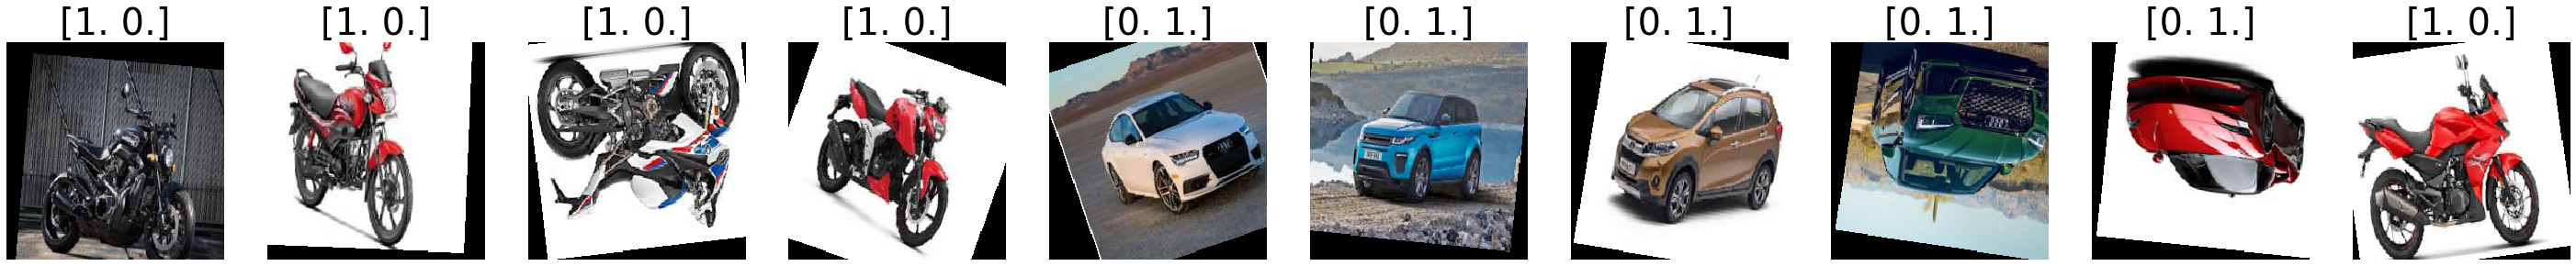

In [28]:
imgs, labels=next(train_batches)
plots(imgs,titles=labels)

**Build and Train CNN**

In [34]:
model= Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    Flatten(),
    Dense(2, activation='softmax')
])
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:

# import tensorflow as tf
# from keras.datasets import cifar10
# from keras.preprocessing.image import ImageDataGenerator
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.layers import Conv2D, AveragePooling2D

# model = Sequential()


# model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape = [224,224,3]))
# model.add(AveragePooling2D())
# model.add(Dropout(0.5))

# # model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
# # model.add(AveragePooling2D())
# # model.add(Dropout(0.5))

# # model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# # model.add(AveragePooling2D())
# # model.add(Dropout(0.5))

# model.add(Flatten())

# model.add(Dense(units=2, activation='relu'))
# # model.add(Dropout(0.2))

# # model.add(Dense(units=128, activation='relu'))

# model.add(Dense(units=2, activation = 'softmax'))

# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_3 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


In [37]:
labels.shape

(10, 2)

In [38]:
# model.compile(Adam(lr=.0001),loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
history = model.fit_generator(train_batches ,steps_per_epoch=4, epochs=25, verbose=2)

Epoch 1/25
 - 1s - loss: 8.0151 - accuracy: 0.5000
Epoch 2/25
 - 1s - loss: 8.0151 - accuracy: 0.5000
Epoch 3/25
 - 1s - loss: 8.0151 - accuracy: 0.5000
Epoch 4/25
 - 1s - loss: 8.0151 - accuracy: 0.5000
Epoch 5/25
 - 1s - loss: 8.0151 - accuracy: 0.5000
Epoch 6/25
 - 1s - loss: 8.0151 - accuracy: 0.5000
Epoch 7/25
 - 1s - loss: 8.0151 - accuracy: 0.5000
Epoch 8/25
 - 1s - loss: 8.0151 - accuracy: 0.5000
Epoch 9/25
 - 1s - loss: 8.0151 - accuracy: 0.5000
Epoch 10/25
 - 1s - loss: 8.0151 - accuracy: 0.5000
Epoch 11/25
 - 1s - loss: 8.0151 - accuracy: 0.5000
Epoch 12/25
 - 1s - loss: 8.0151 - accuracy: 0.5000
Epoch 13/25
 - 1s - loss: 8.0151 - accuracy: 0.5000
Epoch 14/25
 - 2s - loss: 8.0151 - accuracy: 0.5000
Epoch 15/25
 - 1s - loss: 8.0151 - accuracy: 0.5000
Epoch 16/25
 - 1s - loss: 8.0151 - accuracy: 0.5000
Epoch 17/25
 - 2s - loss: 8.0151 - accuracy: 0.5000
Epoch 18/25
 - 1s - loss: 8.0151 - accuracy: 0.5000
Epoch 19/25
 - 1s - loss: 8.0151 - accuracy: 0.5000
Epoch 20/25
 - 1s - l

#### 

**Prediction on test set**

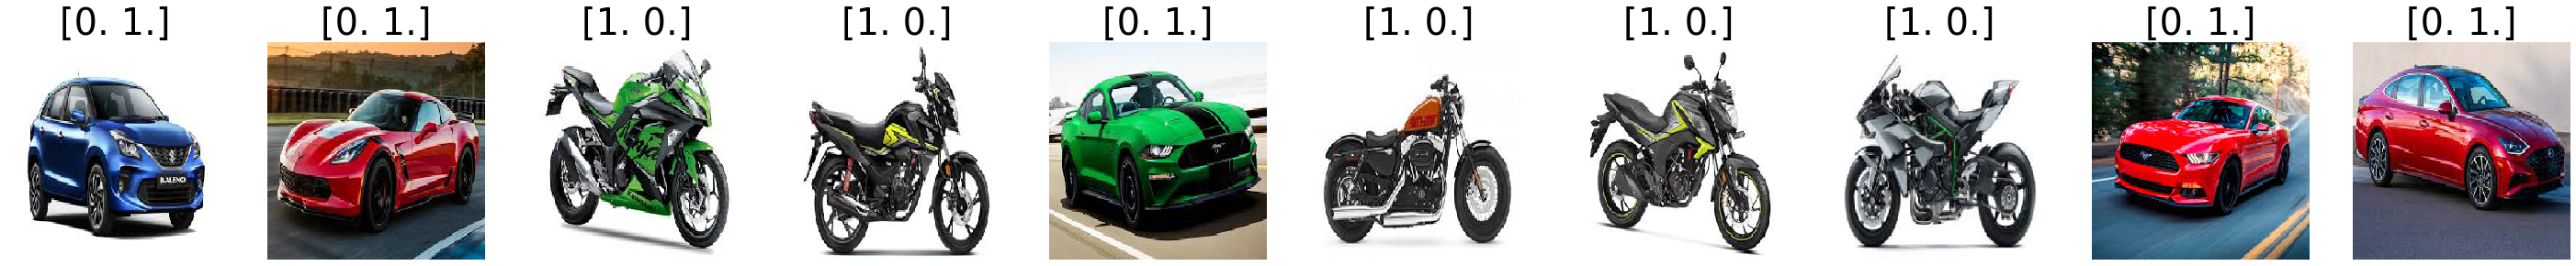

In [14]:
test_imgs, test_labels=next(test_batches)
plots(test_imgs, titles=test_labels)

In [15]:
test_labels=test_labels[:,0]
test_labels

array([0., 0., 1., 1., 0., 1., 1., 1., 0., 0.], dtype=float32)

In [16]:
predictions=model.predict_generator(test_batches, steps=1, verbose=0)

In [17]:
predictions

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [18]:
cm=confusion_matrix(test_labels, predictions[:,0])

In [19]:
cm

array([[5, 0],
       [5, 0]], dtype=int64)

In [20]:
def plot_confusion_matrix(cm,classes, normalize=False, title='confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion matrix")
    else:
        print("confusion matrix without normalization")
        print(cm)
    
    thresh=cm.max()/2,
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j], horizontalalignment="center", color="white" if cm[i,j]>thresh else  "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

confusion matrix without normalization
[[5 0]
 [5 0]]


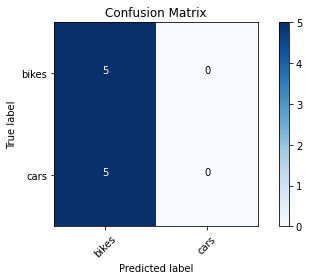

In [21]:
cm_plot_labels=['bikes','cars']
plot_confusion_matrix(cm, cm_plot_labels,title="Confusion Matrix")

**Fine-tune VGG16**